# Motorcycle Performance & Design Analysis

**Research Question:** Welche Faktoren beeinflussen die Leistung und das Design von Motorrädern?

Datensatz: Kaggle – Motorcycle Technical Specifications (1970–2022)

## 1. Imports

In [72]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## 2. Daten laden

In [73]:

df = pd.read_csv("data/all_bikez_curated.csv")
df.sample(n=5)


C:\Users\Smartbar\AppData\Local\Temp\ipykernel_13560\1951939777.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/all_bikez_curated.csv")


,Brand,Model,Year,Category,Rating,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke,...,Dry weight (kg),Wheelbase (mm),Seat height (mm),Front brakes,Rear brakes,Front tire,Rear tire,Front suspension,Rear suspension,Color options
10990,harley-davidson,sportster seventy-two dark custom,2014,Custom / cruiser,NaN,1201.3,NaN,99.0,V2,four-stroke,...,247.2,1524.0,676.0,Single disc. Dual-piston,Single disc. Single-piston,MH90-21,150/80-B16,NaN,NaN,"Black denim, Hard candy chrome flake,Hard cand..."
15794,husqvarna,te 150i,2020,Enduro / offroad,NaN,144.0,NaN,NaN,Single cylinder,two-stroke,...,99.6,1471.0,950.0,Single disc,Single disc. Floating disc. Magura single-pist...,90/90-21,120/80-18,WP-USD Xplor 48 with preload adjuster,WP shock absorber with linkage,White/blue/yellow
919,aprilia,rs4 125 replica,2015,Sport,2.9,124.8,15.0,10.9,Single cylinder,four-stroke,...,NaN,1350.0,820.0,Single disc. Stainless steel disc with radial ...,Single disc. Single 30 mm piston,110/80-R17,130/70-R17,Upside down hydraulic fork,Swingarm. Hydraulic monoshock with adjustable ...,Red
16577,italika,xt110,2020,Sport,NaN,107.0,6.5,6.5,Single cylinder,four-stroke,...,87.0,NaN,775.0,Expanding brake (drum brake),Expanding brake (drum brake),2.50-17,2.50-17,Telescopic fork,Swingarm with single shock absorber,Red
36413,yamaha,ty 50,1976,Trial,3.2,49.0,5.0,NaN,Single cylinder,two-stroke,...,NaN,NaN,NaN,Expanding brake (drum brake),Expanding brake (drum brake),NaN,NaN,NaN,NaN,NaN


In [74]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                38472 non-null  object 
 1   Model                38444 non-null  object 
 2   Year                 38472 non-null  int64  
 3   Category             38472 non-null  object 
 4   Rating               21788 non-null  float64
 5   Displacement (ccm)   37461 non-null  float64
 6   Power (hp)           26110 non-null  float64
 7   Torque (Nm)          16634 non-null  float64
 8   Engine cylinder      38461 non-null  object 
 9   Engine stroke        38461 non-null  object 
 10  Gearbox              32675 non-null  object 
 11  Bore (mm)            28689 non-null  float64
 12  Stroke (mm)          28689 non-null  object 
 13  Fuel capacity (lts)  31704 non-null  float64
 14  Fuel system          27844 non-null  object 
 15  Fuel control         22008 non-null 

,Year,Rating,Displacement (ccm),Power (hp),Torque (Nm),Bore (mm),Fuel capacity (lts),Dry weight (kg),Wheelbase (mm),Seat height (mm)
count,38472.000000,21788.000000,37461.000000,26110.000000,16634.000000,28689.000000,31704.000000,22483.000000,25493.000000,24182.000000
mean,2003.195883,3.401574,552.515072,50.776040,64.527173,72.596713,13.286191,164.151532,1423.113521,789.253246
std,20.083372,0.355631,545.394956,52.082094,63.884654,18.758621,6.010670,85.085133,172.645438,105.492167
min,1894.000000,1.400000,25.000000,0.300000,1.500000,1.000000,0.500000,15.100000,725.000000,39.000000
25%,2000.000000,3.200000,125.000000,12.000000,12.200000,57.000000,8.200000,105.000000,1321.000000,743.000000
50%,2010.000000,3.400000,397.200000,30.000000,57.000000,73.000000,13.500000,145.000000,1422.000000,790.000000
75%,2016.000000,3.700000,805.000000,77.000000,102.000000,88.000000,17.500000,199.600000,1500.000000,830.000000
max,2022.000000,4.600000,8277.000000,804.000000,712.000000,176.000000,64.340000,1000.000000,3327.000000,7501.000000


## 3. Datenbereinigung

In [75]:
cols = [
    'Brand',
    'Year',
    'Category',
    'Displacement (ccm)',
    'Power (hp)',
    'Torque (Nm)',
    'Dry weight (kg)',
    'Seat height (mm)',
    'Fuel capacity (lts)',
    'Wheelbase (mm)'
]

df_clean = df[cols].dropna()
df_clean.sample(n=5)



,Brand,Year,Category,Displacement (ccm),Power (hp),Torque (Nm),Dry weight (kg),Seat height (mm),Fuel capacity (lts),Wheelbase (mm)
14771,honda,2017,Scooter,108.0,8.3,8.7,102.0,760.0,5.5,1255.0
10221,harley-davidson,2000,Custom / cruiser,1449.0,63.0,106.0,302.0,647.0,19.0,1638.0
7717,ducati,2015,Classic,803.0,73.8,68.0,178.0,790.0,13.5,1445.0
7625,ducati,2020,Allround,1262.0,158.0,129.0,209.0,825.0,20.0,1585.0
703,aprilia,2009,Super motard,749.9,92.0,82.0,186.0,870.0,12.0,1505.0


## 4. Leistungsanalyse

### 4.1 Hubraum vs. Leistung

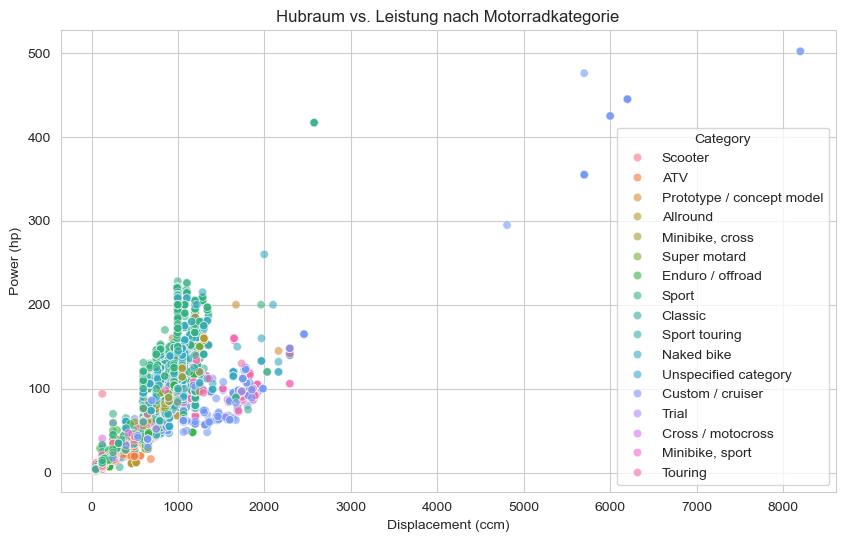

In [76]:

import seaborn as sns

sns.scatterplot(
    data=df_clean,
    x='Displacement (ccm)',
    y='Power (hp)',
    hue='Category',
    alpha=0.6
)

plt.title("Hubraum vs. Leistung nach Motorradkategorie")
plt.show()



### 4.3 Leistung vs Drehmoment

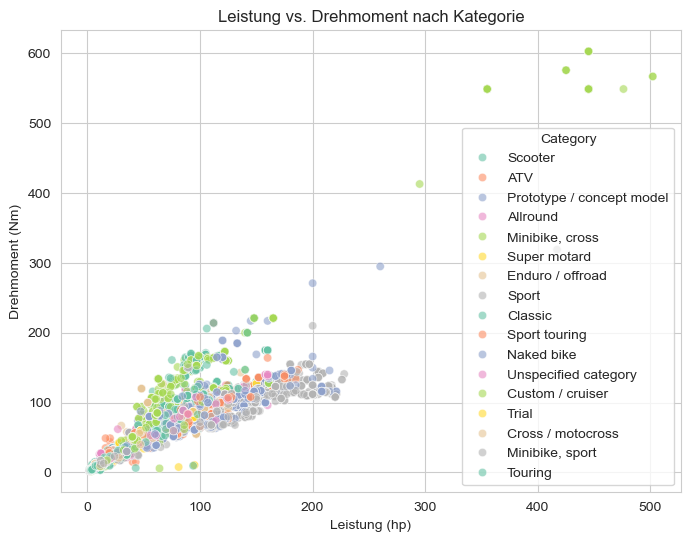

In [77]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df_clean,
    x='Power (hp)',
    y='Torque (Nm)',
    hue='Category',
    alpha=0.6,
    palette='Set2'
)

plt.title("Leistung vs. Drehmoment nach Kategorie")
plt.xlabel("Leistung (hp)")
plt.ylabel("Drehmoment (Nm)")
plt.show()


### 4.3 Hubraum & Drehmoment nach Kategorie

C:\Users\Smartbar\AppData\Local\Temp\ipykernel_13560\1902685186.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


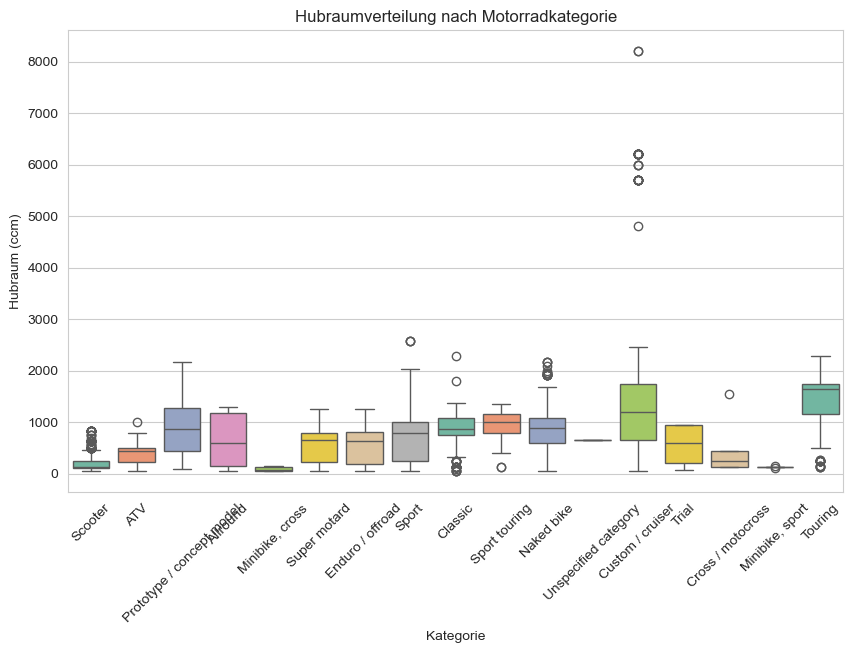

C:\Users\Smartbar\AppData\Local\Temp\ipykernel_13560\1902685186.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


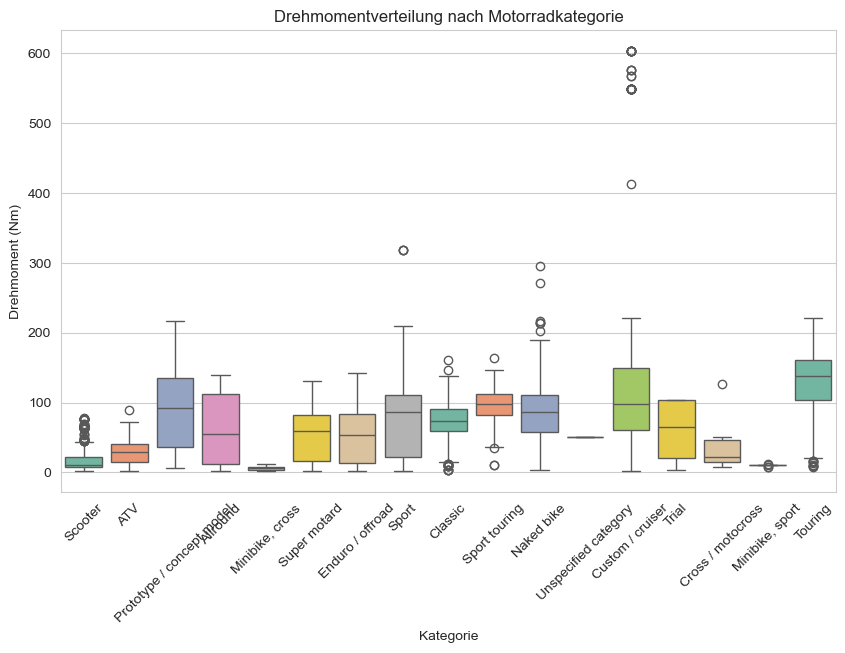

In [83]:
plt.figure(figsize=(10,6))

sns.boxplot(
    data=df_clean,
    x='Category',
    y='Displacement (ccm)',
    palette='Set2'
)
plt.title("Hubraumverteilung nach Motorradkategorie")
plt.xlabel("Kategorie")
plt.ylabel("Hubraum (ccm)")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10,6))

sns.boxplot(
    data=df_clean,
    x='Category',
    y='Torque (Nm)',
    palette='Set2'
)
plt.title("Drehmomentverteilung nach Motorradkategorie")
plt.xlabel("Kategorie")
plt.ylabel("Drehmoment (Nm)")
plt.xticks(rotation=45)
plt.show()


### 4.4 Gewicht vs. Leistung

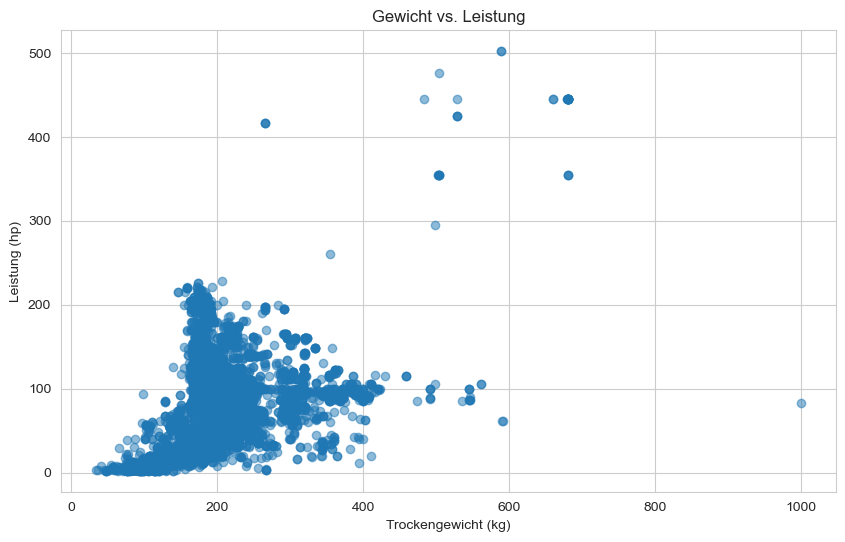

In [79]:

plt.scatter(
    df_clean['Dry weight (kg)'],
    df_clean['Power (hp)'],
    alpha=0.5
)

plt.xlabel("Trockengewicht (kg)")
plt.ylabel("Leistung (hp)")
plt.title("Gewicht vs. Leistung")
plt.show()



## 5. Designanalyse

### 5.1 Sitzhöhe nach Kategorie

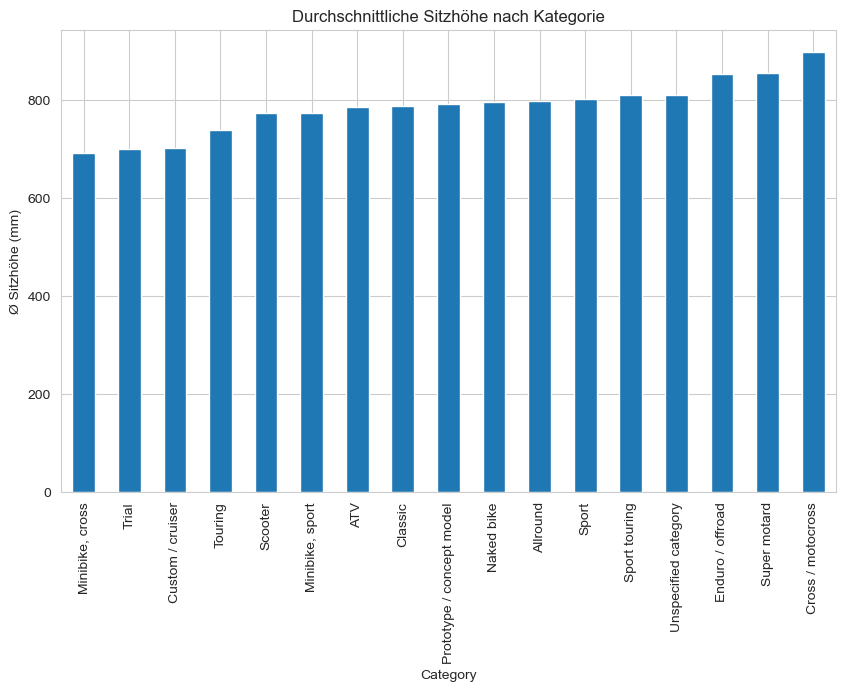

In [80]:

df_clean.groupby('Category')['Seat height (mm)'] \
    .mean() \
    .sort_values() \
    .plot(kind='bar')

plt.ylabel("Ø Sitzhöhe (mm)")
plt.title("Durchschnittliche Sitzhöhe nach Kategorie")
plt.show()



### 5.2 Tankgröße nach Kategorie

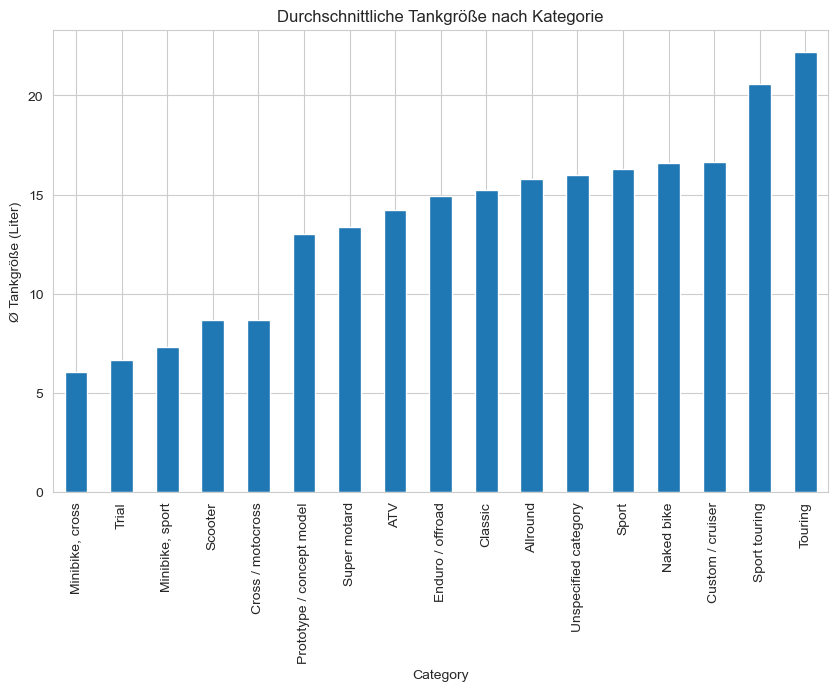

In [81]:
df_clean.groupby('Category')['Fuel capacity (lts)'] \
    .mean() \
    .sort_values() \
    .plot(kind='bar')

plt.ylabel("Ø Tankgröße (Liter)")
plt.title("Durchschnittliche Tankgröße nach Kategorie")
plt.show()



## 6. Zeitliche Entwicklung

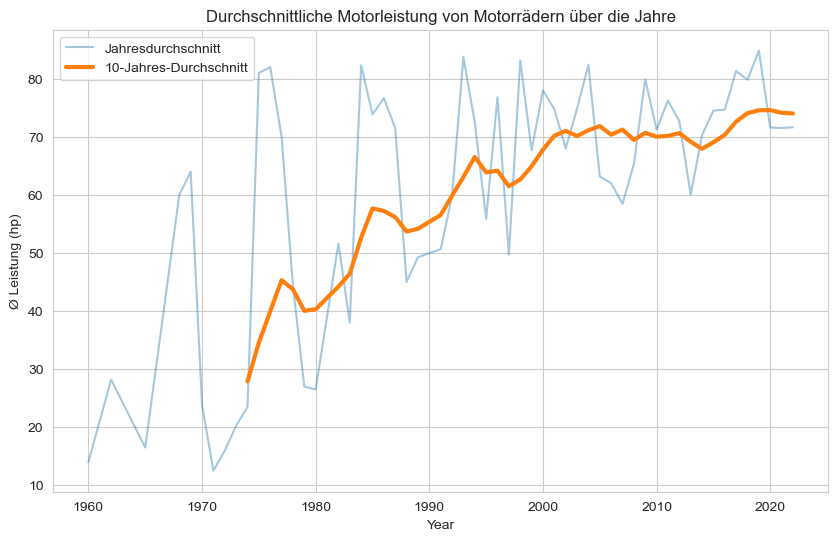

In [82]:
avg_power_per_year = df_clean.groupby('Year')['Power (hp)'].mean()

# Originalkurve
avg_power_per_year.plot(label='Jahresdurchschnitt', alpha=0.4)

# Gleitender Durchschnitt (z. B. 5 Jahre)
avg_power_per_year.rolling(window=10).mean().plot(
    label='10-Jahres-Durchschnitt',
    linewidth=3
)

plt.ylabel("Ø Leistung (hp)")
plt.title("Durchschnittliche Motorleistung von Motorrädern über die Jahre")
plt.legend()
plt.show()



## 7. Fazit

- Hubraum und Gewicht haben starken Einfluss auf die Leistung
- Motorradkategorien unterscheiden sich klar im Design
- Moderne Motorräder erreichen höhere Leistung trotz ähnlichem Gewicht